In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/uts-sdpi/Case 2 - Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df = df.astype({col: 'string' for col in df.select_dtypes(include=['object']).columns})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


In [6]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


In [7]:
label_encoder = LabelEncoder()
columns_to_encode = df.select_dtypes(include=['string']).columns

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [8]:
# one hot encoding
string_columns = df.drop(['tenure','MonthlyCharges','TotalCharges','customerID','Churn'],axis=1).columns

data_encoded = pd.get_dummies(df, columns=string_columns, drop_first=True)

data_encoded

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_1,SeniorCitizen_1,Partner_1,Dependents_1,PhoneService_1,...,StreamingTV_1,StreamingTV_2,StreamingMovies_1,StreamingMovies_2,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,5375,1,29.85,29.85,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,3962,34,56.95,1889.50,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,2564,2,53.85,108.15,1,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,5535,45,42.30,1840.75,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,6511,2,70.70,151.65,1,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,24,84.80,1990.50,0,True,False,True,True,True,...,False,True,False,True,True,False,True,False,False,True
7039,1525,72,103.20,7362.90,0,False,False,True,True,True,...,False,True,False,True,True,False,True,True,False,False
7040,3367,11,29.60,346.45,0,False,False,True,True,False,...,False,False,False,False,False,False,True,False,True,False
7041,5934,4,74.40,306.60,1,True,True,True,False,True,...,False,False,False,False,False,False,True,False,False,True


In [9]:
# Identify boolean columns
bool_columns = data_encoded.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)


In [10]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7043 non-null   int64  
 1   tenure              7043 non-null   int64  
 2   MonthlyCharges      7043 non-null   float64
 3   TotalCharges        7043 non-null   float64
 4   Churn               7043 non-null   int64  
 5   gender_1            7043 non-null   int64  
 6   SeniorCitizen_1     7043 non-null   int64  
 7   Partner_1           7043 non-null   int64  
 8   Dependents_1        7043 non-null   int64  
 9   PhoneService_1      7043 non-null   int64  
 10  MultipleLines_1     7043 non-null   int64  
 11  MultipleLines_2     7043 non-null   int64  
 12  InternetService_1   7043 non-null   int64  
 13  InternetService_2   7043 non-null   int64  
 14  OnlineSecurity_1    7043 non-null   int64  
 15  OnlineSecurity_2    7043 non-null   int64  
 16  Online

In [11]:
standard_scaler = StandardScaler()
# minmax_scaler = MinMaxScaler()

dfstand = standard_scaler.fit_transform(data_encoded.drop(['Churn','customerID'],axis=1))
dfstand

array([[-1.27744458, -1.16032292, -0.99497138, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.06632742, -0.25962894, -0.17387565, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-1.23672422, -0.36266036, -0.96039939, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-0.87024095, -1.1686319 , -0.85518222, ..., -0.52504733,
         1.40641839, -0.54480692],
       [-1.15528349,  0.32033821, -0.87277729, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 1.36937906,  1.35896134,  2.01391739, ..., -0.52504733,
        -0.71102597, -0.54480692]])

In [12]:
dfstand = pd.DataFrame(dfstand, columns=data_encoded.drop(['Churn','customerID'],axis=1).columns)
dfstand

,tenure,MonthlyCharges,TotalCharges,gender_1,SeniorCitizen_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_1,MultipleLines_2,...,StreamingTV_1,StreamingTV_2,StreamingMovies_1,StreamingMovies_2,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,-1.277445,-1.160323,-0.994971,-1.009559,-0.439916,1.034530,-0.654012,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,0.066327,-0.259629,-0.173876,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-1.236724,-0.362660,-0.960399,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,0.514251,-0.746535,-0.195400,0.990532,-0.439916,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-1.236724,0.197365,-0.941193,-1.009559,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,0.990532,-0.439916,1.034530,1.529024,0.327438,-0.327438,1.170719,...,-0.525927,1.265612,-0.525927,1.256171,1.944582,-0.562975,0.829798,-0.525047,-0.711026,1.835513
7039,1.613701,1.277533,2.242808,-1.009559,-0.439916,1.034530,1.529024,0.327438,-0.327438,1.170719,...,-0.525927,1.265612,-0.525927,1.256171,1.944582,-0.562975,0.829798,1.904590,-0.711026,-0.544807
7040,-0.870241,-1.168632,-0.855182,-1.009559,-0.439916,1.034530,1.529024,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
7041,-1.155283,0.320338,-0.872777,0.990532,2.273159,1.034530,-0.654012,0.327438,-0.327438,1.170719,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513


In [13]:
# Concatenate along columns (axis=1)
merged_df = pd.concat([dfstand, data_encoded['Churn']], axis=1)
merged_df

,tenure,MonthlyCharges,TotalCharges,gender_1,SeniorCitizen_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_1,MultipleLines_2,...,StreamingTV_2,StreamingMovies_1,StreamingMovies_2,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Churn
0,-1.277445,-1.160323,-0.994971,-1.009559,-0.439916,1.034530,-0.654012,-3.054010,3.054010,-0.854176,...,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,0
1,0.066327,-0.259629,-0.173876,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.790132,-0.525927,-0.796070,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513,0
2,-1.236724,-0.362660,-0.960399,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513,1
3,0.514251,-0.746535,-0.195400,0.990532,-0.439916,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,...,-0.790132,-0.525927,-0.796070,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807,0
4,-1.236724,0.197365,-0.941193,-1.009559,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,0.990532,-0.439916,1.034530,1.529024,0.327438,-0.327438,1.170719,...,1.265612,-0.525927,1.256171,1.944582,-0.562975,0.829798,-0.525047,-0.711026,1.835513,0
7039,1.613701,1.277533,2.242808,-1.009559,-0.439916,1.034530,1.529024,0.327438,-0.327438,1.170719,...,1.265612,-0.525927,1.256171,1.944582,-0.562975,0.829798,1.904590,-0.711026,-0.544807,0
7040,-0.870241,-1.168632,-0.855182,-1.009559,-0.439916,1.034530,1.529024,-3.054010,3.054010,-0.854176,...,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,0
7041,-1.155283,0.320338,-0.872777,0.990532,2.273159,1.034530,-0.654012,0.327438,-0.327438,1.170719,...,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513,1


In [14]:
merged_df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_1',
       'SeniorCitizen_1', 'Partner_1', 'Dependents_1', 'PhoneService_1',
       'MultipleLines_1', 'MultipleLines_2', 'InternetService_1',
       'InternetService_2', 'OnlineSecurity_1', 'OnlineSecurity_2',
       'OnlineBackup_1', 'OnlineBackup_2', 'DeviceProtection_1',
       'DeviceProtection_2', 'TechSupport_1', 'TechSupport_2', 'StreamingTV_1',
       'StreamingTV_2', 'StreamingMovies_1', 'StreamingMovies_2', 'Contract_1',
       'Contract_2', 'PaperlessBilling_1', 'PaymentMethod_1',
       'PaymentMethod_2', 'PaymentMethod_3', 'Churn'],
      dtype='object')

In [15]:
x = merged_df.drop(['Churn'],axis=1)
y = merged_df['Churn']

# Logistic Regression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
model_logistik = LogisticRegression()
model_logistik.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = model_logistik.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[1386,  153],
       [ 244,  330]])

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

Akurasi: 0.8121154756270705
Precision: 0.8049200184254846
Recall: 0.8121154756270705
F1-Score: 0.8067253474386566


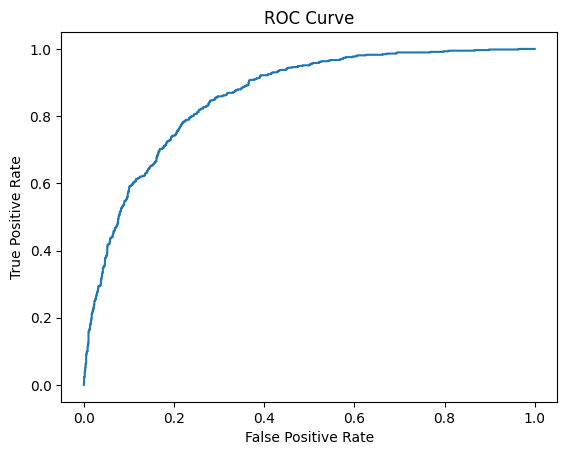

AUC: 0.8587661565838716


In [20]:
y_proba = model_logistik.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc}")

# Random Forest

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = rf.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[1168,  114],
       [ 264,  215]])

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

Akurasi: 0.7853492333901193
Precision: 0.7715377327622593
Recall: 0.7853492333901193
F1-Score: 0.7713567306873742


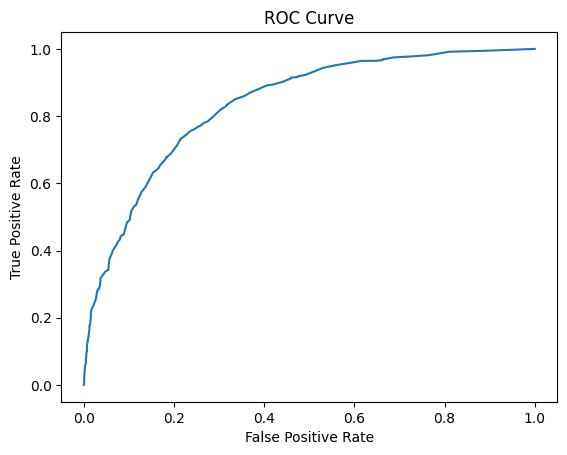

AUC: 0.8351316933679434


In [25]:
y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc}")

# Decision Tree

In [26]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [27]:
y_pred = clf.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[1038,  244],
       [ 238,  241]])

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

Akurasi: 0.7262918796138558
Precision: 0.7273704908824405
Recall: 0.7262918796138558
F1-Score: 0.7268226658834739


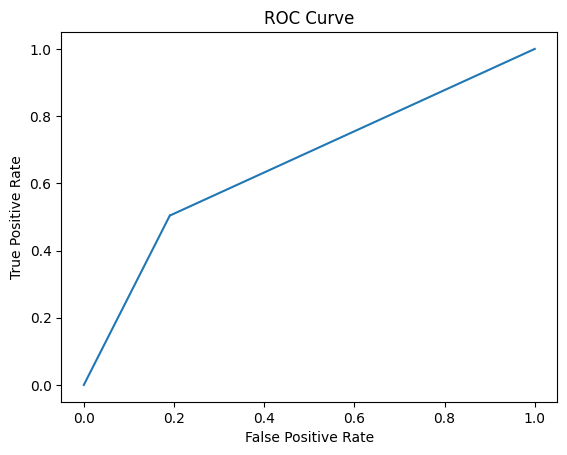

AUC: 0.6566673940444048


In [29]:
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc}")

# Cross Validation

10-fold cross-validation provides a balance between robust evaluation and computational efficiency. It offers a good trade-off by dividing the data into 10 subsets for comprehensive assessment.


In [30]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [31]:
cross_val_results = cross_val_score(model_logistik, x, y, cv=kf)

In [32]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.81843972 0.82269504 0.78865248 0.82528409 0.79971591 0.79829545
 0.80397727 0.77840909 0.81534091 0.80539773]
Mean Accuracy: 0.8056207688588009


# Feature Importance

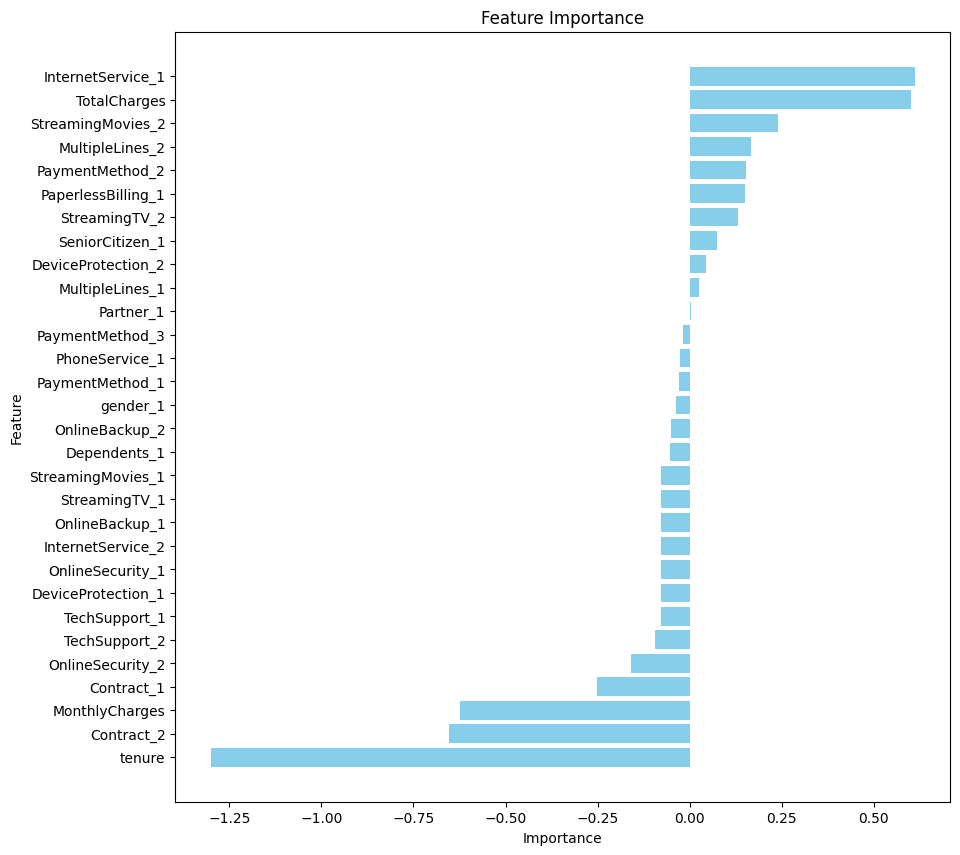

In [33]:
coefficients = model_logistik.coef_[0]
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 10))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [34]:
feature_importance.sort_values(by='Importance', ascending=False)

,Feature,Importance
10,InternetService_1,0.612599
2,TotalCharges,0.602779
23,StreamingMovies_2,0.240239
9,MultipleLines_2,0.166225
28,PaymentMethod_2,0.153901
26,PaperlessBilling_1,0.151253
21,StreamingTV_2,0.132076
4,SeniorCitizen_1,0.075305
17,DeviceProtection_2,0.043413
8,MultipleLines_1,0.024646
